In [23]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [24]:
import yfinance as yf

# Download INO data from 2018-01-01 to 2025-04-30
df_INO = yf.download(
    "INO", 
    start="2009-10-26", 
    end="2020-06-09"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_INO.reset_index(inplace=True)



[*********************100%***********************]  1 of 1 completed


In [25]:



# Save the DataFrame as a CSV file in the correct folder
df_INO.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\INO_historical_data.csv", index=False)


In [26]:
print("Null values count per column:")
print(df_INO.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   INO       0
High    INO       0
Low     INO       0
Open    INO       0
Volume  INO       0
dtype: int64


In [27]:
df_INO.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,INO,INO,INO,INO,INO
count,2672,2672.000000,2672.000000,2672.000000,2672.000000,2.672000e+03
mean,2015-02-15 01:06:17.245508864,68.298054,70.568174,66.271302,68.698159,1.747418e+05
min,2009-10-26 00:00:00,17.760000,18.240000,16.799999,17.760000,5.540000e+02
25%,2012-06-19 18:00:00,37.439999,39.180001,36.480000,37.919998,1.468350e+04
50%,2015-02-17 12:00:00,60.660000,62.520000,58.799999,60.959999,5.837050e+04
75%,2017-10-10 06:00:00,93.120003,95.790001,89.820002,93.629999,1.010145e+05
max,2020-06-08 00:00:00,189.479996,232.320007,180.000000,226.800003,1.626186e+07
std,NaN,34.811159,36.160415,33.557985,35.038149,7.677345e+05


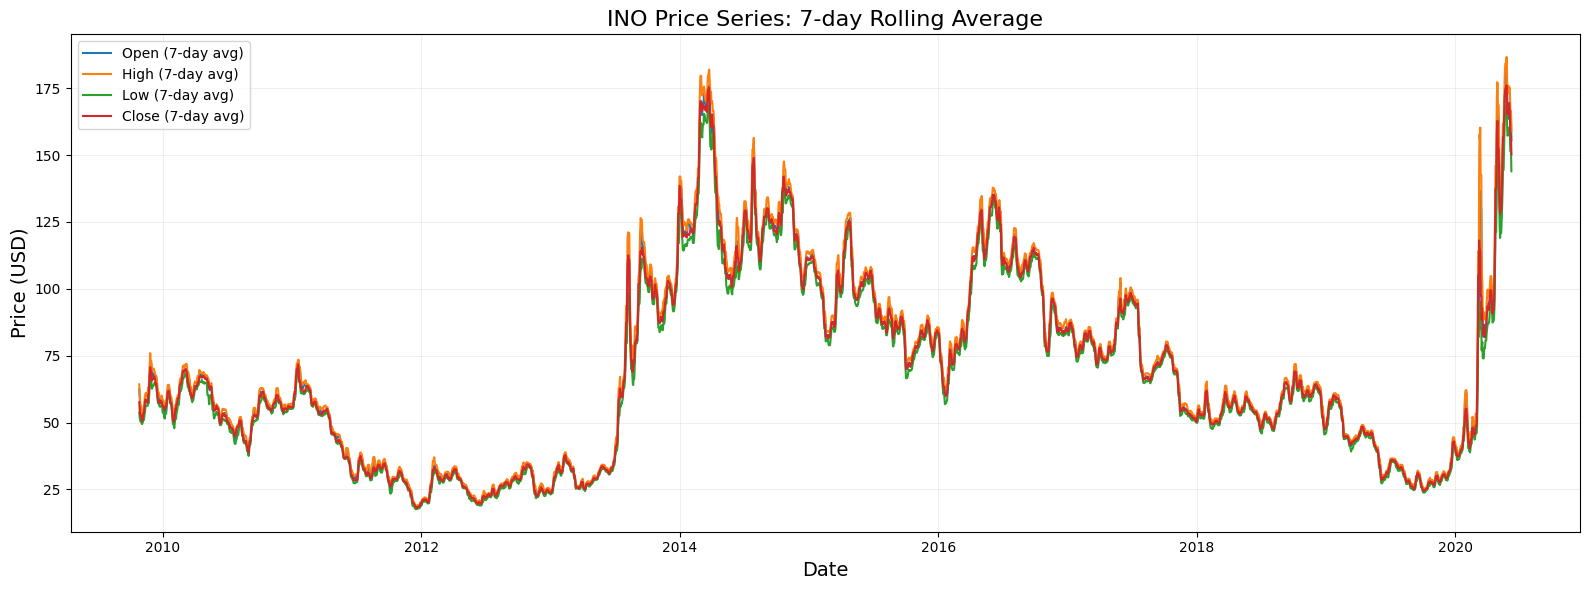

In [28]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_INO, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("INO Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [29]:
print(df_INO.columns)
print(df_INO.columns[df_INO.columns.duplicated()])
print(type(df_INO['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',    ''),
            ( 'Close', 'INO'),
            (  'High', 'INO'),
            (   'Low', 'INO'),
            (  'Open', 'INO'),
            ('Volume', 'INO')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [30]:
df_INO.columns = ['_'.join([str(c) for c in col if c]) for col in df_INO.columns.values]
# Now 'Close_INO', 'High_INO', ...


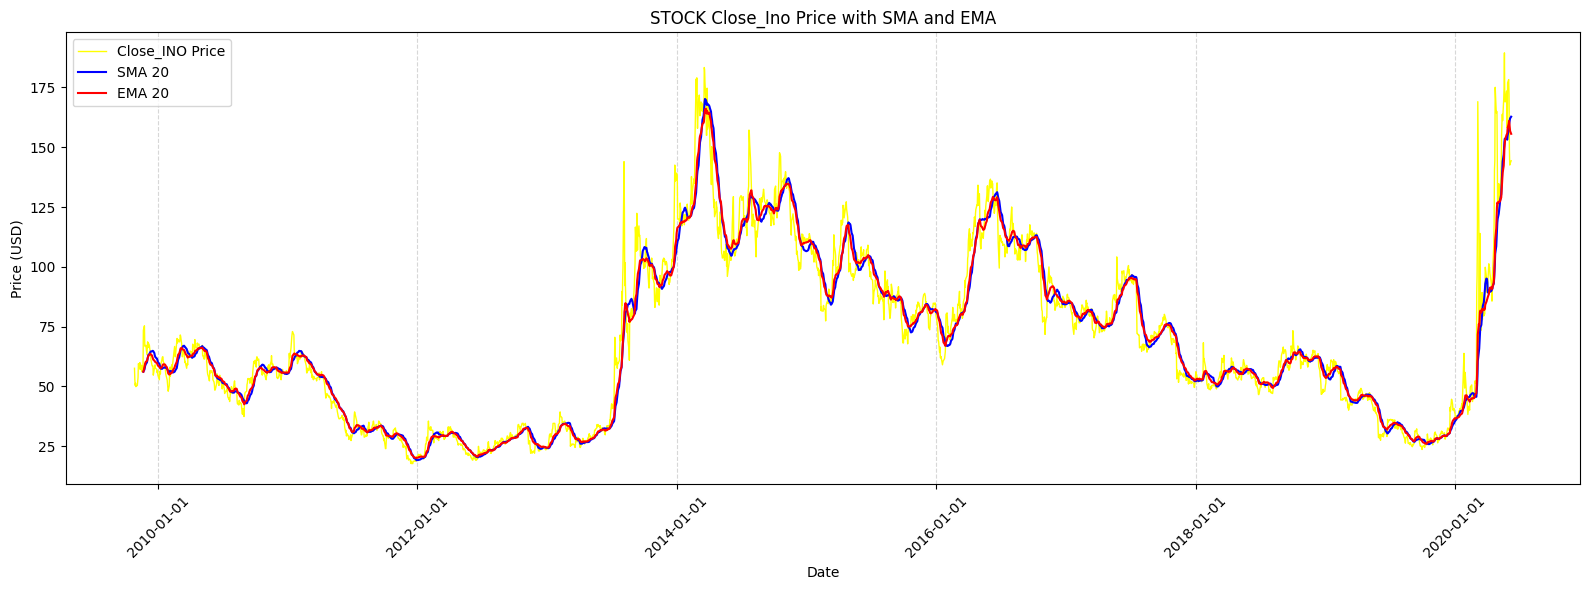

In [31]:
from src.plot_ma import plot_ma
plot_ma(df_INO, 'Close_INO')

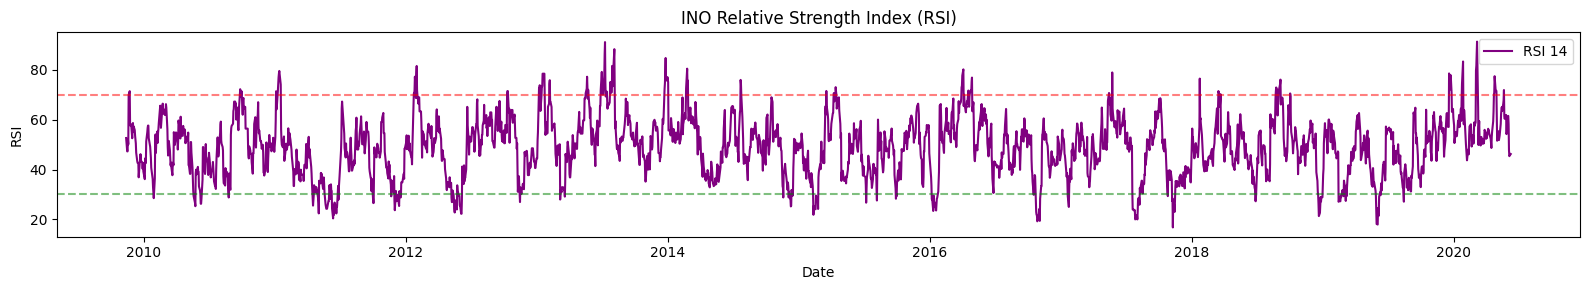

In [32]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_INO, price_col='Close_INO', ticker_name='INO')

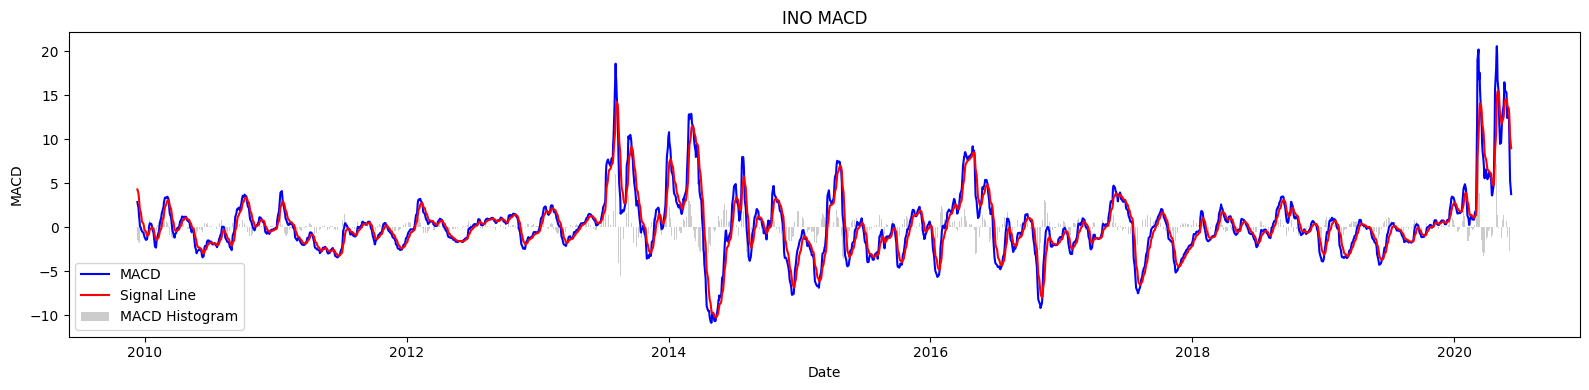

In [33]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_INO, price_col='Close_INO', ticker_name='INO')